In [1]:
# 参考「あたらしい機械学習の教科書」 Chapter 9

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from scipy.stats import multivariate_normal
%matplotlib inline

np.set_printoptions(precision=3, suppress = True)

In [3]:
N = 200
K = 3

X_range0 = [-3, 3]
X_range1 = [-3, 3]

mu_true = np.array([[-1.5, -1.5], [0.0, 1.5], [1.5, -1.0]])
cov_true = np.array([[[0.4, 0], [0, 0.4]], [[0.2, 0], [0, 0.3]], [[0.3, 0], [0, 0.2]]])
pi_true = np.array([0.3, 0.4, 0.3])

In [4]:
N1 = int(N*pi_true[0])
N2 = int(N*pi_true[1])
N3 = N - N1 - N2

X = np.zeros((N, 2))

data1 = np.random.multivariate_normal(mean = mu_true[0], cov = cov_true[0], size = N1)
data2 = np.random.multivariate_normal(mean = mu_true[1], cov = cov_true[1], size = N2)
data3 = np.random.multivariate_normal(mean = mu_true[2], cov = cov_true[2], size = N3)

X = np.concatenate([data1, data2, data3])

print(X.shape)
X[:5]

(200, 2)


array([[-1.244, -1.666],
       [-2.147, -0.592],
       [-1.672, -1.309],
       [-1.223, -0.642],
       [-1.433, -1.698]])

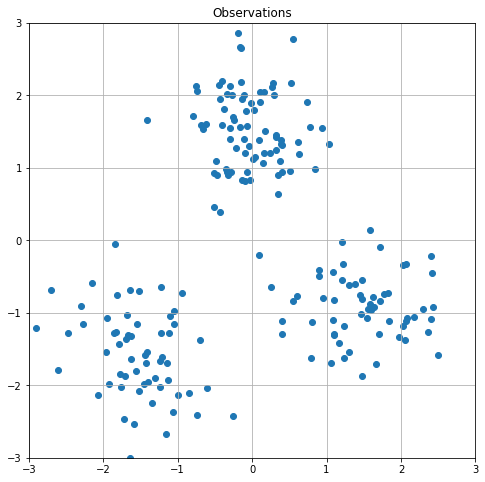

In [5]:
plt.figure(1, figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Observations')
plt.grid(True)
plt.show()

In [6]:
def gauss(x, mu, cov):
    pdf = multivariate_normal.pdf(x, mean=mu, cov=cov)
    return pdf

In [7]:
def mixgauss(x, pi, mu, cov):
    K = len(pi)
    pdf = np.zeros(len(x))
    for k in range(K):
        pdf = pdf + pi[k] * gauss(x, mu[k], cov[k])
    return pdf

In [8]:
# 混合ガウス等高線表示 ----------------------
def show_contour_mixgauss(pi, mu, cov):
    xn = 40  # 等高線表示の解像度
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, xn * xn), np.reshape(xx1, xn * xn)]
    f = mixgauss(x, pi, mu, cov)
    f = f.reshape(xn, xn)
    f = f.T
    plt.xlim(X_range0)
    plt.ylim(X_range1)
    plt.contour(x0, x1, f, 10, colors='gray')

In [9]:
# 混合ガウス 3D 表示、Zの高さはpdf値の合計
def show3d_mixgauss(ax, pi, mu, cov):
    xn = 40  # 等高線表示の解像度
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, xn * xn), np.reshape(xx1, xn * xn)]
    f = mixgauss(x, pi, mu, cov)
    f = f.reshape(xn, xn)
    f = f.T
    plt.xlim(X_range0)
    plt.ylim(X_range1)
    ax.plot_surface(xx0, xx1, f, rstride=2, cstride=2, alpha=0.3, color='blue', edgecolor='black')

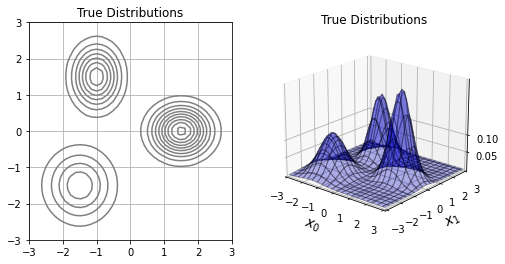

In [10]:
mu = mu_true
cov = cov_true
pi = pi_true

fig = plt.figure(1, figsize=(8, 4))
fig.add_subplot(1, 2, 1)
plt.title('True Distributions')
show_contour_mixgauss(pi, mu, cov)
plt.grid(True)

ax = fig.add_subplot(1, 2, 2, projection='3d')
show3d_mixgauss(ax, pi, mu, cov)
ax.set_zticks([0.05, 0.10])
ax.set_xlabel('$x_0$', fontsize=14)
ax.set_ylabel('$x_1$', fontsize=14)
ax.view_init(20, -50)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('True Distributions')
plt.show()

In [11]:
# EM step を行うための初期値設定
pi = np.array([0.33, 0.33, 0.34])
mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
cov = np.array([[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], [0, 1]]])
gamma = np.c_[np.ones((N, 1)), np.zeros((N, 2))]

# 色設定、その後濃淡を示せるような色にしてある
X_col=np.array([[0.4, 0.6, 0.95], [1, 1, 1], [0, 0, 0]])

In [12]:
gamma[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

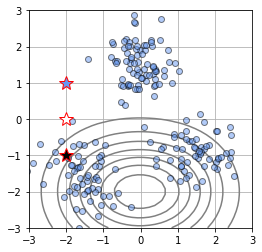

In [13]:
def show_mixgauss_prm(x, gamma, pi, mu, cov):
    N, D = x.shape
    show_contour_mixgauss(pi, mu, cov)
    for n in range(N):
        col= gamma[n,0]*X_col[0] + gamma[n,1]*X_col[1] + gamma[n,2]*X_col[2]
        plt.plot(x[n, 0], x[n, 1], 'o', color=tuple(col), markeredgecolor='black', markersize=6, alpha=0.5)
    for k in range(K):
        plt.plot(mu[k, 0], mu[k, 1], marker='*', markerfacecolor=tuple(X_col[k]), markersize=15, markeredgecolor='red')
    plt.grid(True)

plt.figure(1, figsize=(4, 4))
plt.xlim(X_range0)
plt.ylim(X_range1)
show_mixgauss_prm(X, gamma, pi, mu, cov)
plt.show()

In [14]:
# E step to update gamma
def e_step_mixgauss(x, pi, mu, cov):
    N, D = x.shape
    K = len(pi)
    y = np.zeros((N, K))
    for k in range(K):
        y[:, k] = gauss(x, mu[k, :], cov[k, :, :])  # KxN
    gamma = np.zeros((N, K))
    for n in range(N):
        wk = np.zeros(K)
        for k in range(K):
            wk[k] = pi[k] * y[n, k]
        gamma[n, :] = wk / np.sum(wk)
    return gamma

gamma = e_step_mixgauss(X, pi, mu, cov)

In [15]:
gamma[:5]

array([[0.026, 0.226, 0.748],
       [0.136, 0.406, 0.458],
       [0.047, 0.288, 0.665],
       [0.127, 0.399, 0.474],
       [0.025, 0.221, 0.755]])

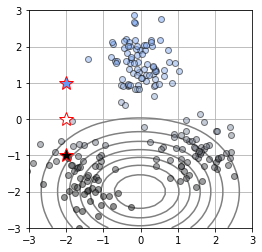

In [16]:
plt.figure(1, figsize=(4, 4))
show_mixgauss_prm(X, gamma, pi, mu, cov)
plt.show()

In [17]:
# M step to update pi, update mu and update cov 
def m_step_mixgauss(x, gamma):
    N, D = x.shape
    N, K = gamma.shape
    pi = np.sum(gamma, axis=0) / N
    mu = np.zeros((K, D))
    for k in range(K):
        for d in range(D):
            mu[k, d] = np.dot(gamma[:, k], x[:, d]) / np.sum(gamma[:, k])
    cov = np.zeros((K, D, D))
    for k in range(K):
        for n in range(N):
            wk = x - mu[k, :]
            wk = wk[n, :, np.newaxis]
            cov[k, :, :] = cov[k, :, :] + gamma[n, k] * np.dot(wk, wk.T)
        cov[k, :, :] = cov[k, :, :] / np.sum(gamma[:, k])
    return pi, mu, cov

pi, mu, cov = m_step_mixgauss(X, gamma)

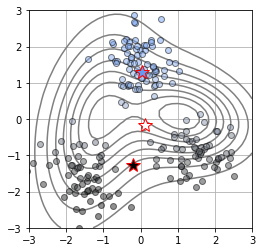

In [18]:
plt.figure(1, figsize=(4, 4))
show_mixgauss_prm(X, gamma, pi, mu, cov)
plt.show()

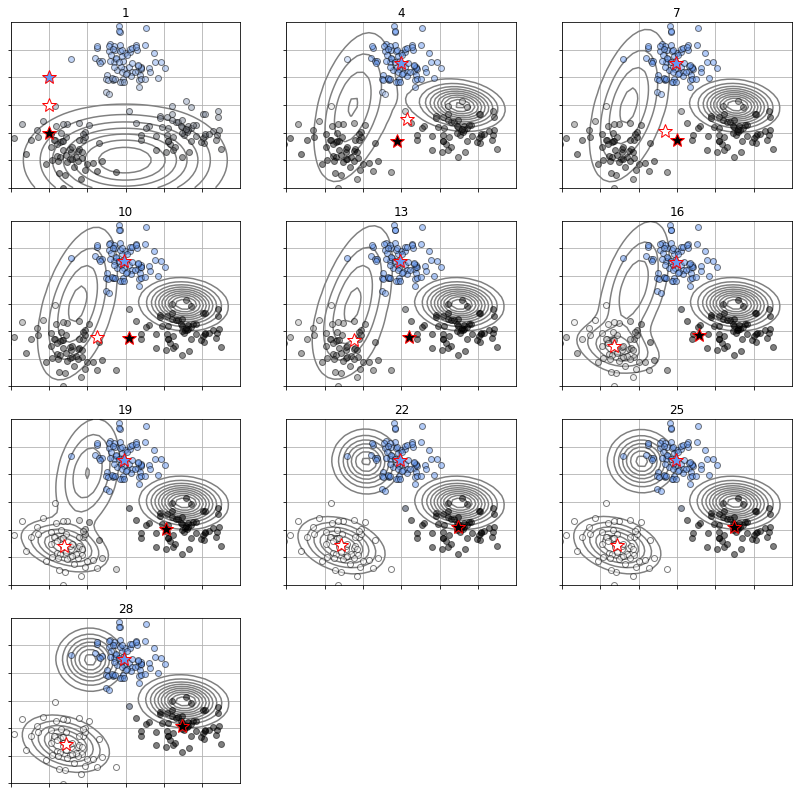

In [19]:
# 初期値設定
pi = np.array([0.33, 0.33, 0.34])
mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
cov = np.array([[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], [0, 1]]])
gamma = np.c_[np.ones((N, 1)), np.zeros((N, 2))]

plt.figure(1, figsize = (14, 14))
max_iteration = 30
subplot_num = 1

gamma_list = []
pi_list = []
mu_list = []
cov_list = []

for iteration in range(max_iteration):
    gamma = e_step_mixgauss(X, pi, mu, cov)

    if iteration % 3 == 0:
        plt.subplot(4, 3, subplot_num)
        show_mixgauss_prm(X, gamma, pi, mu, cov)
        plt.title("{0:d}".format(iteration + 1))
        plt.xticks(range(X_range0[0], X_range0[1]), "")
        plt.yticks(range(X_range1[0], X_range1[1]), "")
        subplot_num = subplot_num + 1
        
    pi, mu, cov = m_step_mixgauss(X, gamma)

    gamma_list.append(gamma)
    pi_list.append(pi)
    mu_list.append(mu)
    cov_list.append(cov)
    
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()

In [20]:
# mu比較、ベクトルの順番を変えて読む
print('mu_true')
print(mu_true)
print('mu_est')
print(mu_list[-1])

mu_true
[[-1.5 -1.5]
 [ 0.   1.5]
 [ 1.5 -1. ]]
mu_est
[[-0.032  1.517]
 [-1.562 -1.562]
 [ 1.483 -0.921]]


In [21]:
# cov比較、ベクトルの順番を変えて読む
print('cov_true')
print(cov_true)
print('cov_est')
print(cov_list[-1])

cov_true
[[[0.4 0. ]
  [0.  0.4]]

 [[0.2 0. ]
  [0.  0.3]]

 [[0.3 0. ]
  [0.  0.2]]]
cov_est
[[[ 0.193 -0.019]
  [-0.019  0.291]]

 [[ 0.294 -0.099]
  [-0.099  0.353]]

 [[ 0.324 -0.005]
  [-0.005  0.198]]]


In [22]:
def nlh_mixgauss(x, pi, mu, cov):
    N, D = x.shape
    K = len(pi)
    y = np.zeros((N, K))
    for k in range(K):
        y[:, k] = gauss(x, mu[k, :], cov[k, :, :])  # KxN
    lh = 0
    for n in range(N):
        wk = 0
        for k in range(K):
            wk = wk + pi[k] * y[n, k]
        lh = lh + np.log(wk)
    return -lh

[630.36 589.85 577.85 575.23 573.68 572.59 571.91 571.5  571.18 570.79
 570.11 568.53 564.09 554.65 547.56 543.53 540.43 536.1  528.35 518.84
 515.36 515.27 515.27 515.27 515.27 515.27 515.27 515.27 515.27 515.27]


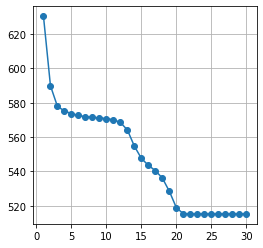

In [23]:
# 初期値設定
pi = np.array([0.33, 0.33, 0.34])
mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
cov = np.array([[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], [0, 1]]])
gamma = np.c_[np.ones((N, 1)), np.zeros((N, 2))]

Err = np.zeros(max_iteration)

for iteration in range(max_iteration):
    gamma = e_step_mixgauss(X, pi, mu, cov)
    pi, mu, cov = m_step_mixgauss(X, gamma)
    Err[iteration] = nlh_mixgauss(X, pi, mu, cov)
    
print(np.round(Err, 2))
plt.figure(2, figsize=(4, 4))
plt.plot(np.arange(max_iteration) + 1, Err, marker='o')
plt.grid(True)
plt.show()